### Область устойчивости
В данном простом ноутбуке на языке Julia построим области устойчивости различных схем решения ОДУ, задаваемых таблицой Бутчера.

Применение численного метода решения ОДУ к уравнению
$$y'=\lambda y$$
приводит к выражению
$$y_{n+1}=R(\lambda h)y_n$$
где $R(\lambda h)$ - функция роста  
h - шаг интегрирования.

Условием устойчивости схемы будет
$$|R(\lambda h)|<1$$
где $\lambda$ может быть комплексным числом.

Фукнция роста для схемы задаваемой таблицой Бутчера $A$ с коэффициентами $b$ задается формулой
$$R(z)=\frac{det(I-zA+zeb^T)}{det(I-zA)}$$
Далее необходимо построить изолинюю на единичном уровне.

In [1]:
using Pkg
Pkg.add("Contour");
Pkg.add("LaTeXStrings");

    Updating registry at `C:\Users\sea2525\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\sea2525\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\sea2525\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\sea2525\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\sea2525\.julia\environments\v1.10\Manifest.toml`


In [2]:
using Plots
using Contour
using LinearAlgebra
using LaTeXStrings

### Подготовим графическое окно
Область устойчивости численной схемы будет показана зеленым цветом. Область собственных числе с отрицательной вещественной частью будет показана штриховкой.

In [3]:
xMax = 5;
plt1 = plot(aspect_ratio = 1,
        xlims = (-xMax, xMax),
        ylims = (-xMax, xMax),
        title = "Область устойчивости численных схем (тест Далквиста)",
        xlabel = L"Re(\xi)",
        ylabel = L"Im(\xi)",
        size = (800, 800),
        legend = false,
        framestyle = :origin);
sq = Plots.Shape([(0, xMax),(0, -xMax),(-xMax, -xMax),(-xMax, xMax)])
    plot!(plt1, sq,
    fillstyle = :\,
    fillcolor = "black",
    alpha = 0.2,
    linewidth = 0);

#### Функция построения области устойчвости будет готовить данные для библиотеки Contour и закрашивать области устойчивости в графическом окне

In [4]:
function drawStabilityArea(A, b, xMax, plotObject)
    N = length(b)
    step = .05
    x = -xMax: step: xMax
    y = -xMax: step: xMax
    Nx = length(x)
    zM = zeros(Nx, Nx)
    
    for i = 1:Nx
        zPrev = 2
        xLeft = x[begin]
        
        for j = 1:Nx
            
            z = x[j] + im*y[i]
            M = Matrix(I, N, N) - z*A
            zM[i, j] = abs(det(M + z * ones(N) * b') / det(M))

            if zM[i, j] < 1 && zPrev >= 1
            
                xLeft = x[j]
            
            elseif ( zM[i, j] >= 1 || j == Nx ) && zPrev < 1
            
                px = Plots.Shape([(xLeft-step/2, y[i]-step/2), (xLeft-step/2, y[i]+step/2), (x[j-1]+step/2, y[i]+step/2), (x[j-1]+step/2, y[i]-step/2)])
                plot!(plotObject, px,
                    fill = "green",
                    fillalpha = 0.2,
                    linewidth = 0)
            
            end
        
            zPrev = zM[i, j]
        
        end
    end
    
#     Построение изолинии
    c1 = Contour.contour(x, y, zM, 1)
    for line in lines(c1)
        xs, ys = coordinates(line)
        shape1 = Plots.Shape(ys, xs)
        plot!(plotObject, shape1,
        fillalpha = 0,
        linewidth = 3,
        linecolor = "black")
    end
end;

### Явные методы
Метод Эйлера

$
A=
\begin{pmatrix}
0
\end{pmatrix}\\
b = \begin{pmatrix}
1
\end{pmatrix}
$


Метод Рунге-Кутта 4-ого порядка

$
A=
\begin{pmatrix}
0 & 0 & 0 & 0\\
0.5 & 0 & 0 & 0\\
0 & 0.5 & 0 & 0\\
0 & 0 & 1 & 0
\end{pmatrix}\\
b = \begin{pmatrix}
1/6 & 1/3 & 1/3 & 1/6
\end{pmatrix}
$

In [5]:
drawStabilityArea([0], [1], xMax, plt1)
drawStabilityArea([0 0 0 0;
     0.5 0 0 0;
    0 0.5 0 0;
    0 0 1 0], [1/6, 1/3, 1/3, 1/6], xMax, plt1)

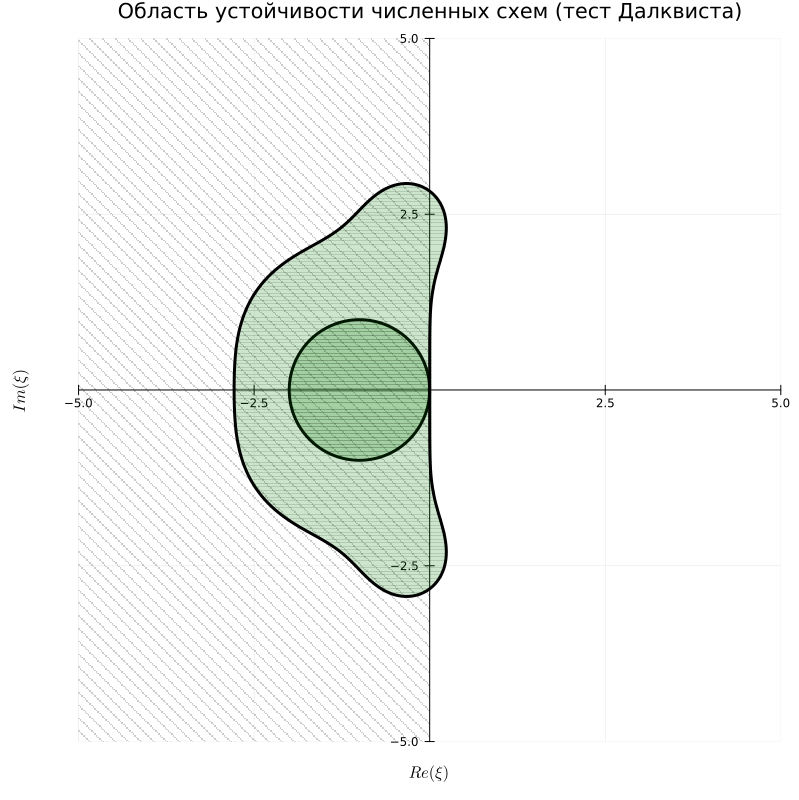

In [6]:
display(plt1)

Видно что метод Рунге-Кутты имеет большую область устойчивости однако, как и любой явный метод, не является А-устойчивым

### Неявные методы
Метод Эйлера

$
A=
\begin{pmatrix}
1
\end{pmatrix}\\
b = \begin{pmatrix}
1
\end{pmatrix}
$


Метод трапеций

$
A=
\begin{pmatrix}
0 & 0\\
0.5 & 0.5
\end{pmatrix}\\
b = \begin{pmatrix}
0.5 & 0.5
\end{pmatrix}
$

In [7]:
xMax = 8;
plt2 = plot(aspect_ratio = 1,
        xlims = (-xMax, xMax),
        ylims = (-xMax, xMax),
        title = "Область устойчивости численных схем (тест Далквиста)",
        xlabel = L"Re(\xi)",
        ylabel = L"Im(\xi)",
        size = (800, 800),
        legend = false,
        framestyle = :origin);
sq = Plots.Shape([(0, xMax),(0, -xMax),(-xMax, -xMax),(-xMax, xMax)])
    plot!(plt2, sq,
    fillstyle = :\,
    fillcolor = "black",
    alpha = 0.2,
    linewidth = 0);

In [8]:
drawStabilityArea([1], [1], xMax, plt2)
drawStabilityArea([0 0; 0.5 0.5], [0.5, 0.5], xMax, plt2)

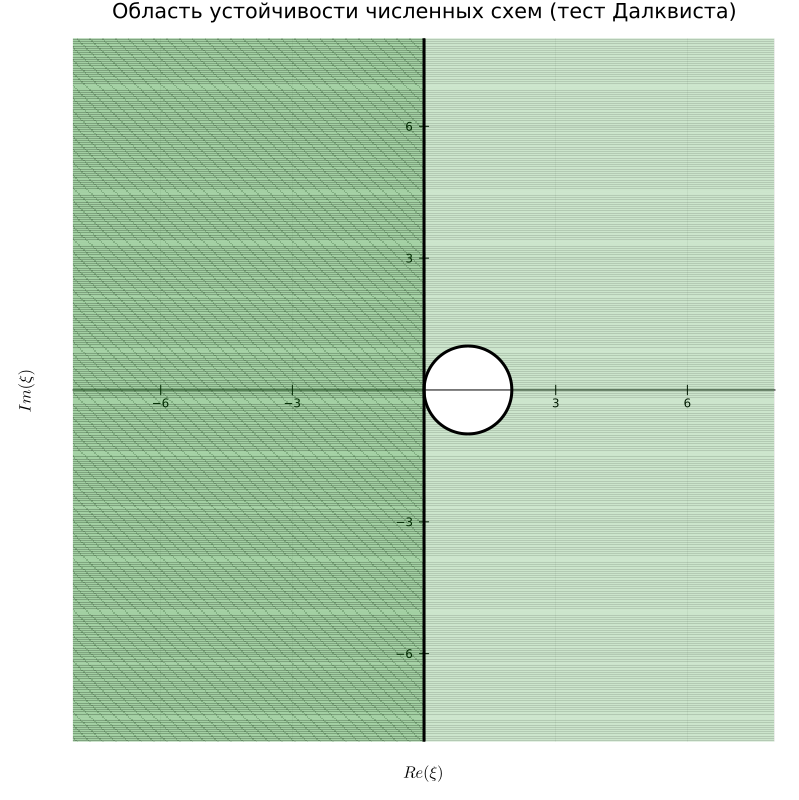

In [9]:
display(plt2)

Оба метода являются А-устойчивыми. Функция роста метода трапеций убывает на бесконечности не так быстро как при интегрировании неявным методом Эйлера, что может приводить к колебаниям решения.